In [2]:
from math import pi
import seaborn as sns
import pandas as pd
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit import execute, Aer
import matplotlib.pyplot as plt
from IPython.display import Image

In [2]:
# True to run the circuit on the simulator, False to run it on the real device
run_simulator = True

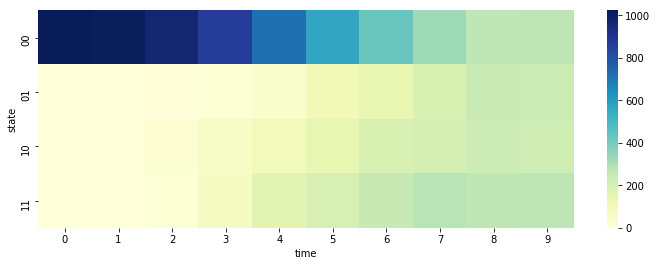

In [20]:
# first circuit

num = 0
time_steps = [0]
for i in range(10):
    num += 0.02
    time_steps.append(num)

time_range = [x for x in range(0,10)]

states = ['00', '01', '10', '11']

q = QuantumRegister(2)
c = ClassicalRegister(2)
qc = QuantumCircuit(q, c)

# creating empty dataframe to store results
df = pd.DataFrame(columns=['state', 'time', 'value'])

count = 0

for t, t_val in zip(time_steps, time_range):
    qc.u1(12*t, q[1])

    qc.barrier(q[0], q[1])
    qc.h(q[0])
    qc.cx(q[1], q[0])
    qc.tdg(q[0])
    qc.cx(q[1], q[0])
    qc.t(q[0])
    qc.t(q[1])
    qc.h(q[1])
    
    qc.barrier(q[0], q[1])
    qc.u1((-pi**2/4)*t, q[0])
    qc.u1((-pi**2/4)*t,q[1])
    qc.cx(q[1], q[0])
    qc.u1((-pi**2/2)*t, q[0])
    qc.cx(q[1], q[0])
    qc.u1((pi**2/2)*t, q[0])
    qc.u1((pi**2/2)*t, q[1])
    qc.h(q[1])
    
    qc.barrier(q[0], q[1])
    qc.cx(q[1], q[0])
    qc.t(q[0])
    qc.t(q[1])
    qc.cx(q[1], q[0])
    qc.tdg(q[0])
    qc.tdg(q[1])
    qc.h(q[0])
    
    qc.barrier(q[0], q[1])
    qc.h(q[0])
    qc.cx(q[1], q[0])
    qc.tdg(q[0])
    qc.cx(q[1],q[0])
    qc.t(q[0])
    qc.t(q[1])
    qc.h(q[1])

    qc.barrier(q[0], q[1])
    qc.u1((-pi**2/4)*t, q[0])
    qc.u1((-pi**2/4)*t, q[1])
    qc.cx(q[1], q[0])
    qc.u1((-pi**2/2)*t, q[0])
    qc.cx (q[1], q[0])
    qc.u1((pi**2/2)*t, q[0])
    qc.u1((pi**2/2)*t, q[1])
    qc.h(q[1])

    qc.barrier(q[0], q[1])
    qc.cx(q[1], q[0])
    qc.t(q[0])
    qc.t(q[1])
    qc.cx(q[1], q[0])
    qc.tdg(q[0])
    qc.tdg(q[1])
    qc.h(q[0])
    
    qc.barrier(q[0], q[1])
    qc.u1(12*t, q[1])
    
    qc.barrier(q[0], q[1])
    qc.measure(q[0], c[0])
    qc.measure(q[1], c[1])

    backend_sim = Aer.get_backend('qasm_simulator')
    job_sim = execute(qc, backend_sim)
    result_sim = job_sim.result()

    dicty = result_sim.get_counts(qc)
    
    for state in states:
        try:
            df.loc[count] = [state, t_val, dicty[state]]
        except KeyError:
            df.loc[count] = [state, t_val, 0]
        count += 1
            
df = df.pivot("state", "time", "value")
df = df[df.columns].astype(int)
plt.figure(figsize = (12, 4))
ax = sns.heatmap(df, cmap="YlGnBu")

<img src="circuit1.png">

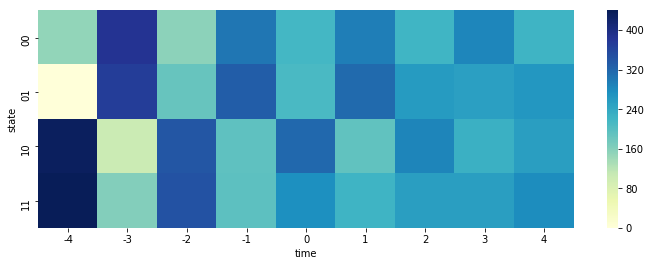

In [16]:
# second circuit

num = 0
time_steps = [0]
for i in range(-4, 5):
    num += 0.02
    time_steps.append(num)

time_range = [x for x in range(-4, 5)]
# change time so its negative not just small

states = ['00', '01', '10', '11']

q = QuantumRegister(2)
c = ClassicalRegister(2)
qc = QuantumCircuit(q, c)

# creating empty dataframe to store results
df = pd.DataFrame(columns=['state', 'time', 'value'])

count = 0

for t, t_val in zip(time_steps, time_range):
    qc.u1(12*t, q[1])
    
    qc.barrier(q[0], q[1])
    qc.h(q[0])
    qc.cx(q[1], q[0])
    qc.tdg(q[0])
    qc.cx(q[1], q[0])
    qc.t(q[0])
    qc.t(q[1])
    qc.h(q[1])
    
    qc.barrier(q[0], q[1])
    qc.x(q[0])
    qc.cx(q[0], q[1])
    qc.u1((pi**2/4)*t, q[0])
    qc.x(q[0])
    qc.cx(q[0], q[1])
    qc.cx(q[0], q[1])
    qc.u3(pi, pi**2*t,(pi**2/4)*t, q[0])
    qc.x(q[0])
    qc.cx(q[0], q[1])
    
    qc.barrier(q[0], q[1])
    qc.cx(q[1], q[0])
    qc.t(q[0])
    qc.t(q[1])
    qc.cx(q[1], q[0])
    qc.tdg(q[0])
    qc.tdg(q[1])
    qc.h(q[0])
    
    qc.barrier(q[0], q[1])
    qc.h(q[0])
    qc.cx(q[1], q[0])
    qc.tdg(q[0])
    qc.cx(q[1], q[0])
    qc.t(q[0])
    qc.t(q[1])
    qc.h(q[1])
    
    qc.barrier(q[0], q[1])
    qc.x(q[0])
    qc.cx(q[0], q[1])
    qc.u1((pi**2/4)*t, q[0])
    qc.x(q[0])
    qc.cx(q[0], q[1])
    qc.cx(q[0], q[1])
    qc.u3(pi, pi**2*t,(pi**2/4)*t, q[0])
    qc.x(q[0])
    qc.cx(q[0], q[1])
    
    qc.barrier(q[0], q[1])
    qc.cx(q[1], q[0])
    qc.t(q[0])
    qc.t(q[1])
    qc.cx(q[1],q[0])
    qc.tdg(q[0])
    qc.tdg(q[1])
    qc.h(q[0])
    
    qc.barrier(q[0], q[1])
    qc.u1(12*t, q[1])
    
    qc.barrier(q[0], q[1])
    qc.measure(q[0], c[0])
    qc.measure(q[1], c[1])

    backend_sim = Aer.get_backend('qasm_simulator')
    job_sim = execute(qc, backend_sim)
    result_sim = job_sim.result()

    dicty = result_sim.get_counts(qc)
    
    for state in states:
        try:
            df.loc[count] = [state, t_val, dicty[state]]
        except KeyError:
            df.loc[count] = [state, t_val, 0]
        count += 1
            
df = df.pivot("state", "time", "value")
df = df[df.columns].astype(int)
plt.figure(figsize = (12, 4))
ax = sns.heatmap(df, cmap="YlGnBu")

<img src="circuit2.png">